In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

## 3.2 観測されたデータの概要を調べる

In [7]:
# データの読み込み
data = pd.read_csv("data3a.csv",dtype={"y": int,"x":float, "f":"category"})

# dの列ごとにデータを表示
print(data)

"""R
d <- read.csv("data3a.csv")

d$x
d$y
d$f
"""

     y      x  f
0    6   8.31  C
1    6   9.44  C
2    6   9.50  C
3   12   9.07  C
4   10  10.16  C
..  ..    ... ..
95   8   9.15  T
96   6   8.52  T
97   8  10.24  T
98   7  10.86  T
99   9   9.97  T

[100 rows x 3 columns]


'R\nd <- read.csv("data3a.csv")\n\nd$x\nd$y\nd$f\n'

In [9]:
# データオブジェクトがどういうクラスに属しているかを調べる
print(type(data))
print(data.info())

"""R
class(d)
class(d$y)
class(d$x)
class(d$f)
"""

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   y       100 non-null    int64   
 1   x       100 non-null    float64 
 2   f       100 non-null    category
dtypes: category(1), float64(1), int64(1)
memory usage: 1.8 KB
None


'R\nclass(d)\nclass(d$y)\nclass(d$x)\nclass(d$f)\n'

In [15]:
# データフレームの概要を調べる
print(data.describe())
print(data.f.describe())
"""R
summary(d)
"""

                y           x
count  100.000000  100.000000
mean     7.830000   10.089100
std      2.624881    1.008049
min      2.000000    7.190000
25%      6.000000    9.427500
50%      8.000000   10.155000
75%     10.000000   10.685000
max     15.000000   12.400000
count     100
unique      2
top         C
freq       50
Name: f, dtype: object


'R\nsummary(d)\n'

## 3.3 統計モデリングの前にデータを図示する

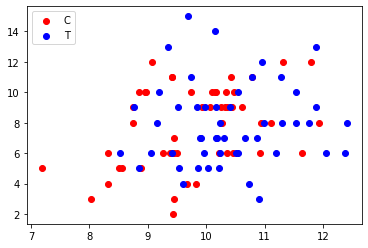

'R\nplot(d$x, d$y, pch=c(21,19)[d$f])\nlegend("topleft", legend=c("C","T"), pch=c(21,19))\n'

In [23]:
# データ全体を見る
data_c = data.loc[data['f']=='C']
data_t = data.loc[data['f']=='T']
plt.scatter(data_c["x"], data_c["y"], color='red', label='C')
plt.scatter(data_t["x"], data_t["y"], color='blue', label='T')
plt.legend(loc='upper left')
plt.show()

"""R
plot(d$x, d$y, pch=c(21,19)[d$f])
legend("topleft", legend=c("C","T"), pch=c(21,19))
"""

## 3.4 ポアソン回帰の統計モデル

In [25]:
# ポアソン回帰の推定量の導出
model = smf.glm('y ~ x', data=data, family=sm.families.Poisson())
result = model.fit()

# 詳細な結果の確認
print(result.summary())

"""R
fit <- glm(y ~ x, data=d, family=poisson)
summary(fit)
"""

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Fri, 11 Feb 2022   Deviance:                       84.993
Time:                        21:51:25   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.0

'R\nfit <- glm(y ~ x, data=d, family=poisson)\nsummary(fit)\n'

In [29]:
# 最大対数尤度と自由度の評価
print(result.llf)
print('df =', result.df_model)

"""R
logLik(fit)
"""

-235.38625076986077
df = 1


'R\nlogLik(fit)\n'

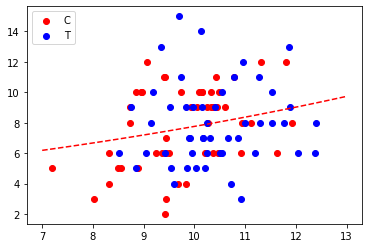

'R\nplot(d$x, d$y, pch=c(21,19)[d$f])\nxx <- seq(min(d$x), max(d$x), length=100)\nlines(xx, exp(1.29+0.0757*xx), lwd=2)\n'

In [33]:
# ポアソン回帰の推定結果を使って、回帰直線を図示
x = np.linspace(7, 13, 100)
y = np.exp(result.params["Intercept"] + x*result.params["x"])

data_c = data.loc[data['f']=='C']
data_t = data.loc[data['f']=='T']
plt.scatter(data_c["x"], data_c["y"], color='red', label='C')
plt.scatter(data_t["x"], data_t["y"], color='blue', label='T')

plt.plot(x,y,"r--")

plt.legend(loc='upper left')
plt.show()

"""R
plot(d$x, d$y, pch=c(21,19)[d$f])
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, exp(1.29+0.0757*xx), lwd=2)
"""

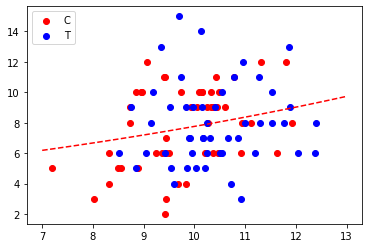

'R\nplot(d$x, d$y, pch=c(21,19)[d$f])\nyy <- predict(fit, newdata=data.frame(x=xx), type="response")\nlines(xx,yy,lwd=2)\n'

In [34]:
# result.predictを使ったやり方
data_c = data.loc[data['f']=='C']
data_t = data.loc[data['f']=='T']
plt.scatter(data_c["x"], data_c["y"], color='red', label='C')
plt.scatter(data_t["x"], data_t["y"], color='blue', label='T')

plt.plot(x, result.predict({"x":x}),"r--")

plt.legend(loc='upper left')
plt.show()

"""R
plot(d$x, d$y, pch=c(21,19)[d$f])
yy <- predict(fit, newdata=data.frame(x=xx), type="response")
lines(xx,yy,lwd=2)
"""

## 3.5 説明変数が因子型の統計モデル

In [35]:
# 因子型の説明変数を使った推定
model = smf.glm('y ~ f', data=data, family=sm.families.Poisson())
result = model.fit()

print(result.summary())

"""R
fit.f <- glm(y ~ f, data=d, family=poisson)
summary(fit.f)
"""

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Fri, 11 Feb 2022   Deviance:                       89.475
Time:                        21:59:35   Pearson chi2:                     87.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.0

'R\nfit.f <- glm(y ~ f, data=d, family=poisson)\nsummary(fit.f)\n'

In [42]:
# 因子型の説明変数を使ったモデルの最大対数尤度
print(result.llf)
print("df =",result.df_model)

"""R
logLik(fit.f)
"""

-235.29371924249367
df = 2


'R\nlogLik(fit.f)\n'

## 3.6 説明変数が数量型＋因子型の統計モデル

In [40]:
# 数量型, 因子型の両方を説明変数を使った推定
model = smf.glm(" y ~ x + f", data=data, family=sm.families.Poisson())
result = model.fit()
print(result.summary())

"""R
fit.all <- glm(y ~ x + f, data=d, family=poisson)
fit.all
"""

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Fri, 11 Feb 2022   Deviance:                       84.808
Time:                        22:02:25   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.0

'R\nfit.all <- glm(y ~ x + f, data=d, family=poisson)\nfit.all\n'

In [41]:
# 最大対数尤度を調べる
print(result.llf)
print("df =", result.df_model)

"""R
logLik(fit.all)
"""

-235.29371924249367
df = 2


'R\nlogLik(fit.all)\n'

# 参考
- https://github.com/takitsuba/midoribon/blob/master/Chap3/